# Clases

> Sospecho, sin embargo, que no era muy capaz de pensar. Pensar es olvidar diferencias, es generalizar, abstraer.
>  
> <cite>Jorge Luis Borges</cite> [Funes el memorioso](https://www.ingenieria.unam.mx/dcsyhfi/material_didactico/Literatura_Hispanoamericana_Contemporanea/Autores_B/BORGES/memorioso.pdf)

## Repaso de algunos conceptos fundamentales

***Objeto***: cada elemento que entra en juego en mi sistema. Es un recorte de un objeto que pertenece a una situación real o imaginaria. Por ejemplo, en un sistema de notas de alumnos, cada alumno, cada materia, cada nota es un objeto.

***Atributo***: cada característica de un objeto. Por ejemplo, el apellido de un alumno, su foto, el nombre de la materia, la fecha de un examen.

***Método o Comportamiento***: respuesta a un mensaje que recibe el objeto. Esencialmente, los métodos definen lo que "sabe" hacer un objeto. Por ejemplo, ¿qué edad tiene el alumno?, ¿cuántas materias aprobadas?, encender un motor a determinada velocidad, obtener la imagen de una cámara.

***Clase***: es una abstracción de un conjunto de objetos que comparten las mismas propiedades (no sus valores necesariamente) y sus métodos.

***Instancia***: objeto de una clase.



## Creación de una clase

> Class *nombre*(*superclase*):  
>     **código de la clase**

## Constructor

Es el método que se ejecuta cuando se crea un objeto de una clase. Debo definir *self* como primer parámetro, y luego puedo adicionar los parámetros que desee (si es que los necesita). Dentro del método constructor creamos los atributos del objeto.

In [ ]:
class Cosa:
    def __init__(self):
        print("Acabo de construirme")

laCosa=Cosa()
print(type(laCosa))


In [ ]:
from datetime import date
from datetime import datetime

class Alumno:
    def __init__(self, apellido, nombre, nacim): # el método constructor debe llamarse __init__
        self.apellido=apellido #defino con self.nombre los atributos de la instancia. Si no antecedo con self. estoy definiendo una variable local.
        self.nombre=nombre
        self.nacimiento=nacim
        self.inscripcion=date.today()

alu1=Alumno("Maradona", "Diego", datetime(1960, 10, 30)) #construcción de un objeto de la clase Alumno
print(alu1.apellido)
print(alu1.nacimiento)
print(alu1.inscripcion)

In [ ]:
# Puedo agregar atributos a un objeto "on the fly" (raro, pero así funciona el mundo de donde nació el paradimga de objetos: 
# prototipado)
alu2=Alumno("Pele", "Juan", datetime(1940,11,2))
alu1.direccion="Segurola y Habana"
print(alu2.apellido)
print(alu1.direccion)
print(type(alu1))
print(type(alu2))
print(alu2.direccion) #Esto me da error

# Ojo, es algo extraño... No lo recomiendo hasta no tener recontraclaro el uso de clases.

In [ ]:
alu3=alu1
print(alu3.apellido)
alu3.apellido="Paz"
print(alu3.apellido)
print(alu1.apellido)

## Atributos

Los atributos que acabamos de definir en el constructor, son atributos de la instancia. Esto significa que, desde el punto de vista estructural, todas las instancias tendrán los mismos atributos, pero el valor en cada uno de ellos será independiente. Por ejemplo, todas las instancias de la clase Alumno tendrán apellido, nombre, nacimiento e inscripción, pero el valor al que refieren será independiente en cada alumno.  

### Atributos de clase
Podríamos necesitar una referencia que sea compartida por todos los objetos de la clase. Se las conoce como  atributos de clase. Si modifican su valor, lo hacen para todas las instancias de la clase.  

In [ ]:
class Robot:
    maxVel=10

    def __init__(self, x, y, rot):
        self.x=x
        self.y=y
        self.rot=rot

r=Robot(0,0,90)
r2=Robot(10,10,180)
print("R: ", r.x," - ", r.y," - ", r.rot, " - ", r.maxVel)
print("R2: ", r2.x," - ", r2.y," - ", r2.rot, " - ", r2.maxVel)
print("---")
Robot.maxVel=20
print("R: ", r.x," - ", r.y," - ", r.rot, " - ", r.maxVel)
print("R2: ", r2.x," - ", r2.y," - ", r2.rot, " - ", r2.maxVel)
print("---")
r.maxVel=15 # Acabo de crear una propiedad del objeto r en particular en su tabla de símbolos locales. NOOOO ES RECOMENDABLE!!!!
print("R: ", r.x," - ", r.y," - ", r.rot, " - ", r.maxVel)
print("R2: ", r2.x," - ", r2.y," - ", r2.rot, " - ", r2.maxVel)
print("---")
Robot.maxVel=40
print("R: ", r.x," - ", r.y," - ", r.rot, " - ", r.maxVel)
print("R2: ", r2.x," - ", r2.y," - ", r2.rot, " - ", r2.maxVel)


## Métodos 

> def *nombre*(self, *\[par1, par2,...\]*):  
>     *código*  
>     \[return *valor*\]  

Los métodos pueden ser públicos (los puede llamar el cliente de la clase) o privados (pueden llamarse internamente, no forman parte de su protocolo). También pueden ser de instancia (método que invoco mediante un mensaje a un objeto de la clase), de clase (método que invoco enviando mensaje a la clase).


In [ ]:
import math
class Robot:
    maxVel=10

    def __init__(self, x, y, rot):
        self.x=x
        self.y=y
        self.rot=rot

    def girar(self, grados):
        self.rot=(self.rot+grados)%360

    def descripcion(self):
        return f"X: {self.x} Y: {self.y} Rot: {self.rot}"

    def __distanciaEnX(self, x): #método privado
        return abs(self.x-x)

    def __distanciaEnY(self, y): #método privado
        return abs(self.y-y)

    def distancia(self, x,y):
        return math.sqrt(self.__distanciaEnX(x)**2+self.__distanciaEnY(y)**2)

    
    @classmethod # Con este decorador se declaran los métodos de clase
    def metodoDeClase(cls):
        print(f"Desde el método de clase puedo acceder a las variables de clase (maxvel={cls.maxVel}) u otros métodos de clase")
        return f"Soy un método de la clase {cls}"
    
    def metodoDeInstancia(self):
        return f"Soy un método de la instancia {self}"

    #Los métodos estáticos no reciben parámetro (no reciben ni instancia ni clase)
    #Se usan habitualmente en clases abstractas que brindan métodos que dependen sólo de sus parámetros
    @staticmethod
    def metodoEstatico():
        return f"No puedo acceder a nada externo al método"
  
r=Robot(0,0,90)
r2=Robot(10,10,180)
# print(r.descripcion())
# r2.girar(250)
# print(r2.descripcion())
# r.girar(-180)
# print(r.descripcion())
# # print(r.__distanciaEnX(5))
# print(r.distancia(3,4))
print(Robot.metodoDeClase())
print(r.metodoDeInstancia())
print(Robot.metodoEstatico())

#Las instancias pueden acceder a los métodos de clase o estáticos.
print("Llamando desde una instancia: ", r.metodoDeClase())


### Atributos públicos y privados

Si no lo indicamos explícitamente, los atributos son públicos. Es decir, puedo acceder a su referencia desde el módulo donde creo los objetos de la clase. Como veremos más adelante, esto aumenta el acoplamiento, y por lo tanto, no es deseable implementarlo de esta manera. Por ejemplo, si deseáramos cambiar la estructura interna de los objetos de mi clase, esto tendría impacto en todos sus clientes, porque el acceso es directo. Si la forma de acceder a la estructura fuera indirecta, podemos cambiar todo lo que querramos mientras los métodos expuestos respeten el contrato original (qué le paso y qué devuelven)

In [ ]:
class Robot:

    def __init__(self, x, y, rot):
        self.__x=x
        self.__y=y
        self.__rot=rot
    
    def dameX(self):
        return self.__x

    def definoX(self, valor):
        self.__x=valor

r=Robot(10,10,90)
# print(r.__x)
print(r.dameX())
r.definoX(100)
print(r.dameX())

Veamos un ejemplo más claro de desacoplamiento de la representación de los datos de la clase

In [ ]:
class Robot:

    def __init__(self, x, y, rot):
        self.__x=x
        self.__y=y
        self.__rot=rot
        self.movimientosFuturos=""
    
    def hacerMovimiento(self):
        pos=self.movimientosFuturos.find(" ")
        if len(self.movimientosFuturos)==0:
            return "No hay movimientos"
        elif pos!=-1:
            resu=self.movimientosFuturos[:pos]
            self.movimientosFuturos=self.movimientosFuturos[pos+1:]
        else:
            resu=self.movimientosFuturos
            self.movimientosFuturos=""
        return resu

r=Robot(10,10,90)
r.movimientosFuturos="Derecha Arriba Derecha"
print(r.movimientosFuturos)
print(r.hacerMovimiento())
print(r.movimientosFuturos)
print(r.hacerMovimiento())
print(r.hacerMovimiento())
print(r.hacerMovimiento())

Veo que sería mucho más práctico tenerlo en una lista. Pero hay cien mil personas que ya están usando la clase con su método hacerMovimiento... Sería un caos modificarle a todos el "contrato", el protocolo que establecimos originalmente. Esto significa que mi clase está demasiado acoplada. Veamos una solución:

In [ ]:
# Si yo lo hubiera creado originalmente así, usando una cadena, pero con el atributo desacoplado...
class Robot:

    def __init__(self, x, y, rot):
        self.__x=x
        self.__y=y
        self.__rot=rot
        self.__movimientosFuturos=""
    
    def definirMovimientos(self, movs):
        self.__movimientosFuturos=movs
    
    def mostrarMovimientos(self):
        return self.__movimientosFuturos

    def hacerMovimiento(self):
        pos=self.__movimientosFuturos.find(" ")
        if len(self.__movimientosFuturos)==0:
            return "No hay movimientos"
        elif pos!=-1:
            resu=self.__movimientosFuturos[:pos]
            self.__movimientosFuturos=self.__movimientosFuturos[pos+1:]
        else:
            resu=self.__movimientosFuturos
            self.__movimientosFuturos=""
        return resu

r=Robot(10,10,90)
r.definirMovimientos("Derecha Arriba Derecha")
print(r.mostrarMovimientos())
print(r.hacerMovimiento())
print(r.hacerMovimiento())
print(r.hacerMovimiento())
print(r.hacerMovimiento())


In [ ]:
# Puedo modificar su estructura interna sin modificar el protocolo
class Robot:

    def __init__(self, x, y, rot):
        self.__x=x
        self.__y=y
        self.__rot=rot
        self.__movimientosFuturos=[]
    
    def definirMovimientos(self, movs):
        # Antes era así: self.__movimientosFuturos=movs
        self.__movimientosFuturos=movs.split()
    
    def mostrarMovimientos(self):
        #Antes era así: return self.__movimientosFuturos
        cad=" "
        return cad.join(self.__movimientosFuturos)

    def hacerMovimiento(self):
        #Antes era un choclo...
        if len(self.__movimientosFuturos)==0:
            return "No hay movimientos"
        else:
            return self.__movimientosFuturos.pop()

# El código que usa la clase no cambia en absolutamente nada. Se mantiene igual y ni se entera!!!!!
r=Robot(10,10,90)
r.definirMovimientos("Derecha Arriba Derecha")
print(r.mostrarMovimientos())
print(r.hacerMovimiento())
print(r.hacerMovimiento())
print(r.hacerMovimiento())
print(r.hacerMovimiento())

### Getters y Setters

Este desacoplamiento es muy habitual (y muy bueno hacerlo así). La única molestia es que para la asignación del valor del atributo (lo que se conoce como ***setter***), debo usar un método en vez del tradicional "=". Y a su vez, para recuperar el valor (lo que se conoce como ***getter***), no alcanza con mencionarlo: también debo usar un método.  
Para hacer más bonito el desacoplamiento de atributos, se definen decoradores (los indicadores con @) que nos permiten indicar cuál es el método getter y el setter, de forma tal que automáticamente funcionen con la asignación con "=" y con la mención del atributo, ejecutando el método correspondiente

In [ ]:
# Utilizando decoradores para getters y setters
class Robot:

    def __init__(self, x, y, rot):
        self.__x=x
        self.__y=y
        self.__rot=rot
        self.__movimientosFuturos=[]

    @property #decorador para el getter
    def movimientosFuturos(self):
        cad=" "
        return cad.join(self.__movimientosFuturos)

    @movimientosFuturos.setter #sdecorador para el setter
    def movimientosFuturos(self, movs):
        self.__movimientosFuturos=movs.split()
    
    def hacerMovimiento(self):
        #Antes era un choclo...
        if len(self.__movimientosFuturos)==0:
            return "No hay movimientos"
        else:
            return self.__movimientosFuturos.pop()

# Usando getters y setter parece que estoy accediendo directamente al atributo, pero en realidad lo tengo desacoplado por métodos.

r=Robot(10,10,100)
r.movimientosFuturos="Derecha Arriba Derecha"
print(r.movimientosFuturos)
print(r.hacerMovimiento())
print(r.movimientosFuturos)
print(r.hacerMovimiento())
print(r.hacerMovimiento())
print(r.hacerMovimiento())

# Perdón, estuve mintiendo un poco!!!!  

En realidad, no existe una forma explícita de pedir que un método o atributo sea privado. ¿Pero cómo, si esto anduvo?

In [ ]:
class Robot:

    def __init__(self, x, y, rot):
        self.__x=x
        self.__y=y
        self.__rot=rot
        self._privada="Ma qué privada!"
    
    def dameX(self):
        return self.__x

    def definoX(self, valor):
        self.__x=valor

r=Robot(10,10,90)
print(r._Robot__x) #Cuac, se imprimió!!!
r._Robot__x=34 #Y lo modifico como se me antoja
print(r._Robot__x)
print(r._privada)


En realidad, la indicación de que un atributo o método es privado, es sólo una cuestión de convención, Y DEBERÍA HACERSE CON UN UNICO GUION BAJO DELANTE. Con el guión bajo, seguimos pudiendo acceder al atributo o método, pero el programador que usa la clase, sabe que si tiene esa notación, no se debe acceder en forma directa. Es decir, nunca tengo que acceder a una propiedad o un método que empieza con _.  Si lo hago, y después cambia algo interno, finalmente el que se va a jorobar soy yo...

Ahora bien, ¿por qué usamos dos guiones bajos? Porque lo que produce esto, es un renombramiento de la propiedad como lo acabamos de ver.

## Polimorfismo  

Llamamos polimorfismo a la posibilidad de responder a un mensaje con objetos de distinto tipo, mientras esos objetos implementen dicho protocolo. Por ejemplo, si encuentro un clavo flojo detrás de mi biblioteca, posiblemente pueda solucionarlo con el taco del zapato, con el recuerdo de la piedra movediza de Tandil o con un martillo. Los 3 objetos, que está claro que no son de la misma clase, implementan el protocolo *martillar*.  

Al tener tipado dinámico, es muy sencillo implementar el polimorfismo en Python. Simplemente debemos tener la precaución de que el objeto al cual le envío el mensaje, sepa responder al mismo. Veamos un ejemplo:


In [ ]:
class Rectangulo:
    def __init__(self, base, altura):
        self.__base=base
        self.__altura=altura

    @property
    def base(self):
        return self.__base
    
    @base.setter
    def base(self, valor):
        self.__base=valor

    @property
    def altura(self):
        return self.__altura
    
    @altura.setter
    def altura(self, valor):
        self.__altura=valor

    def perimetro(self):
        return self.base*2+self.altura*2

    def superficie(self):
        return self.base*self.altura


rec=Rectangulo(10, 23)
print(rec.perimetro())
print(rec.superficie())


In [ ]:
import math

class Circulo:
    def __init__(self, radio):
        self.__radio=radio

    @property
    def radio(self):
        return self.__radio
    
    @radio.setter
    def radio(self, valor):
        self.__radio=valor

    def perimetro(self):
        return math.pi*2*self.radio

    def superficie(self):
        return math.pi*self.radio**2

fig=Circulo(5) 

print("El perímetro del Círculo es: {}".format(fig.perimetro()))
print("La superficie del Círculo es: {}".format(fig.superficie()))

fig= Rectangulo(10, 5)

print("El perímetro del Rectángulo es: {}".format(fig.perimetro()))
print("La superficie del Rectángulo es: {}".format(fig.superficie()))

lista=[Circulo(5), Rectangulo(10,10), Rectangulo(6,5)]
for fig in lista:
    print(fig.perimetro())



## Herencia y Composición  
  
Estos dos conceptos, fundamentales en el paradigma, se confunden fácilmente. 

Comencemos con la herencia. Una clase *A* ***hereda*** de otra clase *B*, cuando los objetos de *A* extienden y / o modifican el comportamiento de los objetos de la clase *B*. Podríamos pensarlo como una especialización. El objeto de la clase *B* es una **especialización** de los objetos de la clase *A*. Los objetos de la clase *A* saben hacer lo mismo que los de la clase *B* (tal vez algunas cosas de otra manera), y tal vez saben hacer algunas cosas más.  


La sintaxis para definir la herencia es la siguiente:

> class *nombreDeClase*(*claseDeLaQueHereda*):  
>   *código de la clase*

Dado que el código es largo, vamos a ver cómo se implementa en Python en el ejemplo de Productos (Productos.py - SistemaComercio.py)

Puedo sobreescribir métodos y atributos. Para determinar qué método utiliza para responder al mensaje, hace un ***lookup***, es decir, busca en la propia clase; si no hay método allí, buscar en su superclase (la clase madre) y así sucesivamente.

En un método puedo invocar al método sobreescrito con el mensaje super().

Si reescribimos el método __str__, cuando invoquemos al método print con un objeto, imprimirá lo que __str__ devuelva.



## Clase abstracta

Una clase abstracta permite definir los componentes comunes a sus subclases concretas (métodos, partes de métodos, atributos), pero no habilita la construcción de un objeto de dicha clase. Cuando defino un conjunto de clases que entiendo comparten comportamiento o atributos, puedo ***subir*** estos elementos comunes a una clase superior, superclase de las clases del conjunto, para explicitar y unificar esto que comparten.  

Para hacer explícito esto en Python debemos importar de Abstract Base Class (abc) la clase ABC y el decorador abstractmethod de la siguiente manera:

> from abc import ABC, abstractmethod

Posteriormente, al crear la clase abstracta defino su herencia de la clase ABC, y anticipo los métodos abstractos con el decorador @abstractmethod como podemos ver en el siguiente ejemplo:

In [ ]:
from abc import ABC, abstractmethod
from math import pi

class Figura(ABC):

    @abstractmethod
    def superficie(self):
        pass

class Circulo(Figura):
    def __init__(self, radio):
        self.radio=radio

    def superficie(self):
        return pi*self.radio**2

class Cuadrado(Figura):
    def __init__(self, lado):
        self.lado=lado

    def superficie(self):
        return self.lado**2


fig=Figura()
# fig=Circulo(5)
# print(fig.superficie())
# fig=Cuadrado(10)
# print(fig.superficie())

## Eliminación de referencias

Para eliminar la referencia de una variable, usamos el comando *del*

In [ ]:
from datetime import date
from datetime import datetime

class Alumno:
    def __init__(self, apellido, nombre, nacim): # el método constructor debe llamarse __init__
        self.apellido=apellido #defino con self.nombre los atributos de la instancia. Si no antecedo con self. estoy definiendo una variable local.
        self.nombre=nombre
        self.nacimiento=nacim
        self.inscripcion=date.today()

alu1=Alumno("Maradona", "Diego", datetime(1960, 10, 30)) #construcción de un objeto de la clase Alumno
print(alu1.apellido)
print(alu1.nacimiento)
print(alu1.inscripcion)

del alu1
print(alu1.apellod)

## Sobrecarga de operadores

Así como vimos que podíamos definir un método que es invocado al imprimir un objeto (__str__), también podemos sobrecargar operadores habituales, creando los métodos correspondientes como se puede ver en las siguientes imágenes:

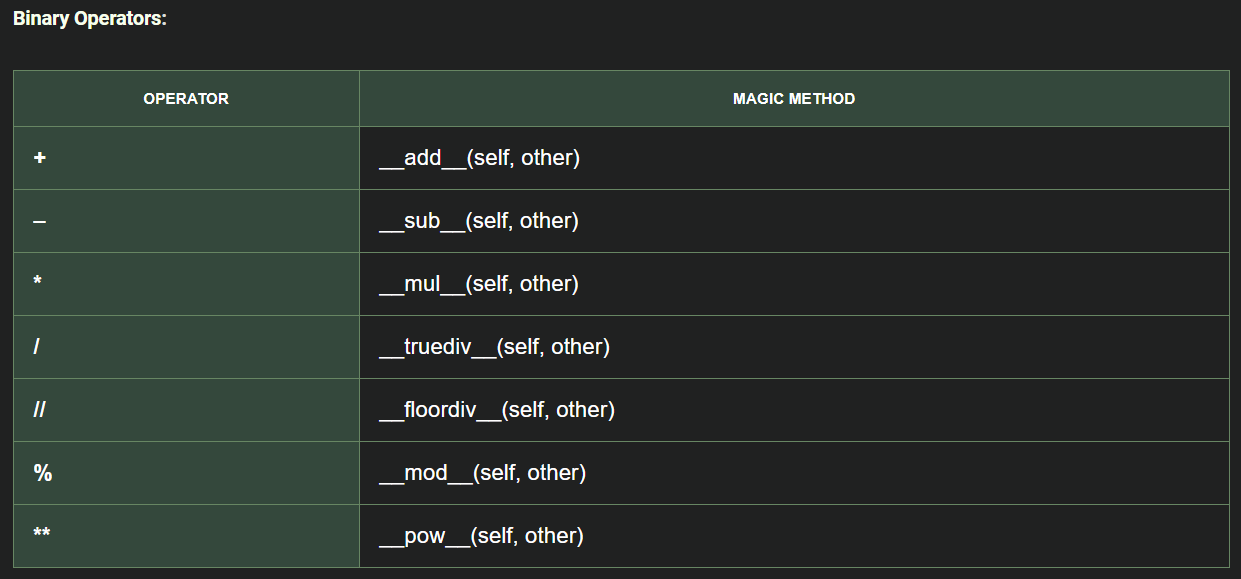

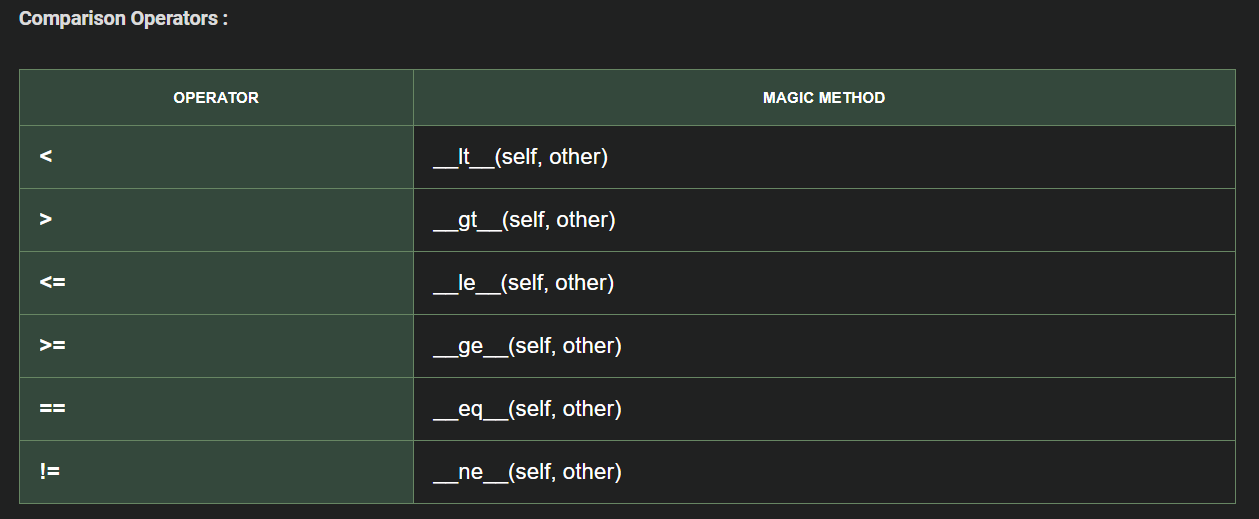

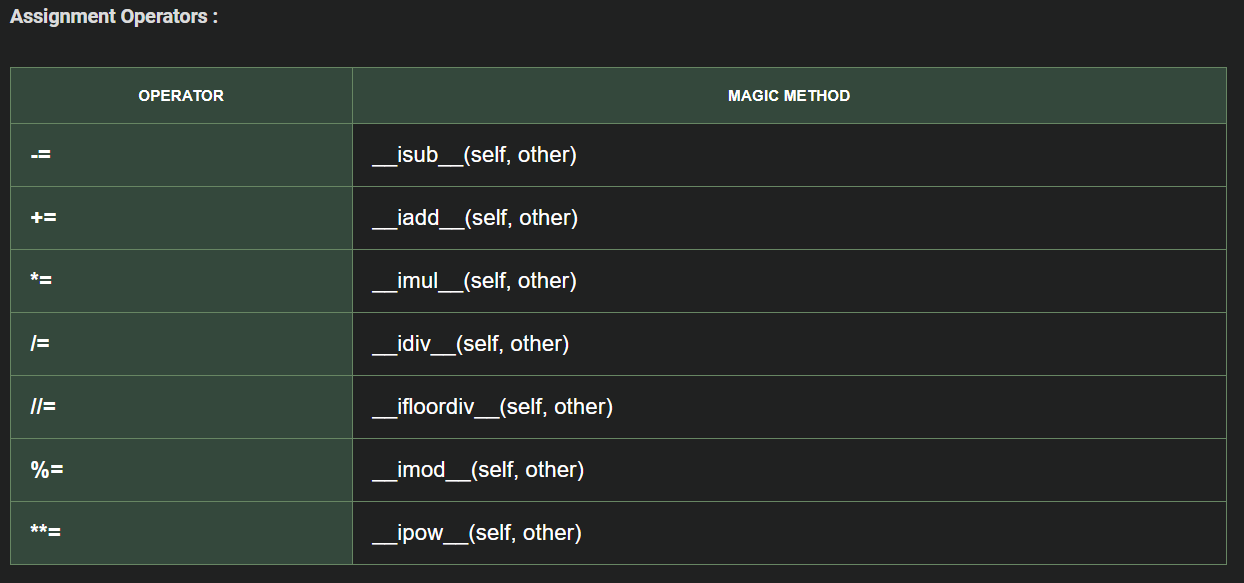

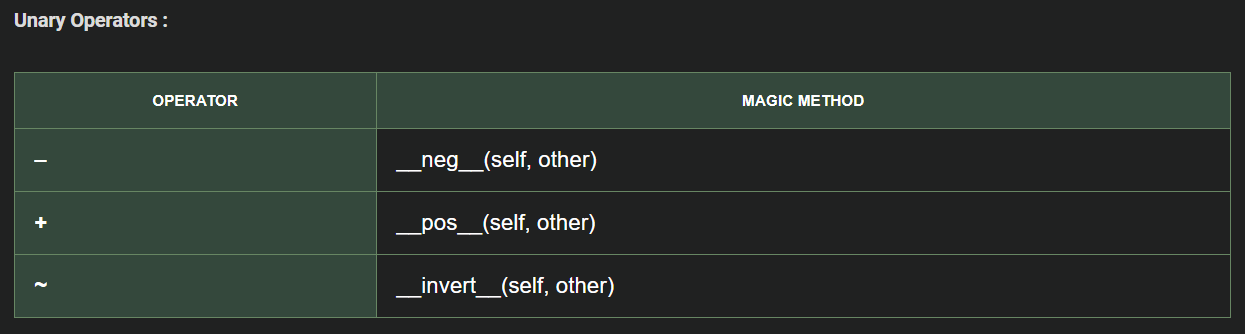

In [ ]:
class PalabraNL:
    def __init__(self, pala):
        self.__palabra__=pala
    
    @property
    def palabra(self):
        return self.__palabra__
    
    @palabra.setter
    def palabra(self, pala):
        self.__palabra__=pala

    def __lt__(self, otra):
        return self.palabra<otra.palabra
        # return len(self.palabra)<len(otra.palabra)

a=PalabraNL("Casa")
b=PalabraNL("Avión")

print(a.palabra)
print(b.palabra)
print(a<b)


# Diseño de patrones en Python! <https://python-patterns.guide/>